# 🚦 "Start your engines!"

<!--
Other possible titles:
- "Parade Lap" to indicate the first time using Herbie, and showing the capabilities
- "Driver's Ed" to indicate a new user should start here
-->

With Herbie installed, you are about to begin the race. The following are some key concepts:

1. Numerical weather prediction (NWP) data is diseminated in GRIB2 format.
1. Herbie helps you find, download, and load NWP data from different archive sources. 
1. The `Herbie` class is the most fundamental component of Herbie. Herbie races to look for the NWP model data you ask for.

Let's see how to use Herbe. First, import Herbie.


In [1]:
from herbie import Herbie

ERROR 1: PROJ: proj_create_from_database: Open of /home/blaylock/miniconda3/envs/herbie-dev/share/proj failed


Tell Herbie the model run date you are interested in. The input date can be a Pandas parseable Date-Time string, or a datetime object.

By default it looks for the HRRR model (unless you modified the Herbie configuration file).

When I create Herbie objects, I like to save them to the variable `H`:


In [2]:
H = Herbie("2024-04-01 12:00")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Apr-01 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


You can see that Herbie says it found the HRRR model for the date we asked for, at Amazon Web Services (AWS).

Show where the file is located:


In [3]:
H.grib

'https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20240401/conus/hrrr.t12z.wrfsfcf00.grib2'

If no file was found, Herbie will tell you.


In [4]:
Herbie("2000-01-01")

💔 Did not find ┊ model=hrrr ┊ product=sfc ┊ 2000-Jan-01 00:00 UTC F00


▌▌Herbie HRRR model sfc product initialized 2000-Jan-01 00:00 UTC F00 ┊ source=None

Ok, back to our example. You can specify other arguments in the Herbie class.


In [5]:
H = Herbie(
    "2024-04-01 12:00",  # Model initialization time
    model="hrrr",        # Model name
    fxx=6,               # Forecast step, in hours
    product="sfc",       # Model product
)
H

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Apr-01 12:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


▌▌Herbie HRRR model sfc product initialized 2024-Apr-01 12:00 UTC F06 ┊ source=aws

There are three fundamental things you can do with a Herbie object:

1. Show an inventory of the file contents;
1. Download the GRIB2 file to your local machine;
1. Open specific GRIB messages (variables) into an xarray Dataset.

## GRIB2 file inventory

File invenotries are retuned as a Pandas DataFrame.

Let's first show how to show a file inventory for a GFS 12-hr forecast file.


In [6]:
H = Herbie("2024-02-05", model="gfs", fxx=12)
H.inventory()

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Feb-05 00:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1,0,999868.0,0-999868,2024-02-05,2024-02-05 12:00:00,PRMSL,mean sea level,12 hour fcst,:PRMSL:mean sea level:12 hour fcst
1,2,999869,1091477.0,999869-1091477,2024-02-05,2024-02-05 12:00:00,CLMR,1 hybrid level,12 hour fcst,:CLMR:1 hybrid level:12 hour fcst
2,3,1091478,1376295.0,1091478-1376295,2024-02-05,2024-02-05 12:00:00,ICMR,1 hybrid level,12 hour fcst,:ICMR:1 hybrid level:12 hour fcst
3,4,1376296,1621422.0,1376296-1621422,2024-02-05,2024-02-05 12:00:00,RWMR,1 hybrid level,12 hour fcst,:RWMR:1 hybrid level:12 hour fcst
4,5,1621423,1717851.0,1621423-1717851,2024-02-05,2024-02-05 12:00:00,SNMR,1 hybrid level,12 hour fcst,:SNMR:1 hybrid level:12 hour fcst
...,...,...,...,...,...,...,...,...,...,...
738,739,534226517,534874064.0,534226517-534874064,2024-02-05,2024-02-05 12:00:00,VGRD,PV=-2e-06 (Km^2/kg/s) surface,12 hour fcst,:VGRD:PV=-2e-06 (Km^2/kg/s) surface:12 hour fcst
739,740,534874065,535523722.0,534874065-535523722,2024-02-05,2024-02-05 12:00:00,TMP,PV=-2e-06 (Km^2/kg/s) surface,12 hour fcst,:TMP:PV=-2e-06 (Km^2/kg/s) surface:12 hour fcst
740,741,535523723,536688853.0,535523723-536688853,2024-02-05,2024-02-05 12:00:00,HGT,PV=-2e-06 (Km^2/kg/s) surface,12 hour fcst,:HGT:PV=-2e-06 (Km^2/kg/s) surface:12 hour fcst
741,742,536688854,537810720.0,536688854-537810720,2024-02-05,2024-02-05 12:00:00,PRES,PV=-2e-06 (Km^2/kg/s) surface,12 hour fcst,:PRES:PV=-2e-06 (Km^2/kg/s) surface:12 hour fcst


GRIB files have a lot of data in them. Each GRIB message represents a different variable at a specific level or layer. You can filter the GRIB messages for a specific variable. Finding exactly what you want takes some getting used to, but if you play with the inventory print out, you'll get the hange of it.

Pay special attention to the `search_this` column; you can use regular expression to filter the rows based on that column.

> **Don't know regex yet?** It is worth learning, I highly recomend it 😄 You can use sites like <https://regex101.com/> or ChatGPT to explain how regex works.

For example, lets get all temperature fields on pressure levels: ([Explain](https://regex101.com/r/mJpuLb/2))

> Note: the `r` preceeding `r"string"` means this is a "raw" string, which is needed for some regex expressions so backslashes are not escaped. When using regex as a string, it's best practice to get in the habit of using `r"string"`.


In [7]:
H.inventory(r":TMP:\d+ mb:")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
95,96,74664821,75478525.0,74664821-75478525,2024-02-05,2024-02-05 12:00:00,TMP,1 mb,12 hour fcst,:TMP:1 mb:12 hour fcst
105,106,82369600,83190647.0,82369600-83190647,2024-02-05,2024-02-05 12:00:00,TMP,2 mb,12 hour fcst,:TMP:2 mb:12 hour fcst
115,116,90185842,90990476.0,90185842-90990476,2024-02-05,2024-02-05 12:00:00,TMP,3 mb,12 hour fcst,:TMP:3 mb:12 hour fcst
125,126,97861692,98668588.0,97861692-98668588,2024-02-05,2024-02-05 12:00:00,TMP,5 mb,12 hour fcst,:TMP:5 mb:12 hour fcst
135,136,105711779,106489418.0,105711779-106489418,2024-02-05,2024-02-05 12:00:00,TMP,7 mb,12 hour fcst,:TMP:7 mb:12 hour fcst
145,146,113582833,114350030.0,113582833-114350030,2024-02-05,2024-02-05 12:00:00,TMP,10 mb,12 hour fcst,:TMP:10 mb:12 hour fcst
155,156,121299505,122061980.0,121299505-122061980,2024-02-05,2024-02-05 12:00:00,TMP,15 mb,12 hour fcst,:TMP:15 mb:12 hour fcst
165,166,129508823,130263235.0,129508823-130263235,2024-02-05,2024-02-05 12:00:00,TMP,20 mb,12 hour fcst,:TMP:20 mb:12 hour fcst
175,176,137665804,138402308.0,137665804-138402308,2024-02-05,2024-02-05 12:00:00,TMP,30 mb,12 hour fcst,:TMP:30 mb:12 hour fcst
185,186,146139516,146897181.0,146139516-146897181,2024-02-05,2024-02-05 12:00:00,TMP,40 mb,12 hour fcst,:TMP:40 mb:12 hour fcst


Lets do another.

Get U and V wind at 10 m above the surface: ([Explain](https://regex101.com/r/3XA5Rn/1))


In [8]:
H.inventory(r":[U|V]GRD:10 m above")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
587,588,419775774,420738935.0,419775774-420738935,2024-02-05,2024-02-05 12:00:00,UGRD,10 m above ground,12 hour fcst,:UGRD:10 m above ground:12 hour fcst
588,589,420738936,421677436.0,420738936-421677436,2024-02-05,2024-02-05 12:00:00,VGRD,10 m above ground,12 hour fcst,:VGRD:10 m above ground:12 hour fcst


## Download GRIB files

Herbie can download full files or select messages from a GRIB file.

Let's download a full HRRR file, and for the sake of demonstration, lets turn on verbose information:


In [9]:
H = Herbie("2024-01-01 06:00", model="hrrr", fxx=6)
myFile = H.download(verbose=True)
myFile

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-01 06:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/home/blaylock/data/hrrr/20240101]
✅ Success! Downloaded HRRR from aws                 
	src: https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20240101/conus/hrrr.t06z.wrfsfcf06.grib2
	dst: /home/blaylock/data/hrrr/20240101/hrrr.t06z.wrfsfcf06.grib2


PosixPath('/home/blaylock/data/hrrr/20240101/hrrr.t06z.wrfsfcf06.grib2')

HRRR files are large--over 100 mb per file--which takes time and space (GFS files are even larger; over 500 MB for a single file!). You very likely don't need _everything_ that is provided in a GRIB file. This is why knowing how to filter the inventory, as shown earlier, is very important; you can specify which GRIB messages you actually want to download.

Now lets just download the 10-m wind fields from the HRRR file:


In [10]:
H = Herbie("2024-01-01 06:00", model="gfs", fxx=6)
mySubset = H.download(r":[U|V]GRD:10 m above", verbose=True)
mySubset

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-01 06:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
👨🏻‍🏭 Created directory: [/home/blaylock/data/gfs/20240101]
📇 Download subset: ▌▌Herbie GFS model pgrb2.0p25 product initialized 2024-Jan-01 06:00 UTC F06 ┊ source=aws                                                            
 cURL from https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20240101/06/atmos/gfs.t06z.pgrb2.0p25.f006
Found 2 grib messages.
Download subset group 1
  588 :UGRD:10 m above ground:6 hour fcst
  589 :VGRD:10 m above ground:6 hour fcst
curl -s --range 417094105-418994003 "https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20240101/06/atmos/gfs.t06z.pgrb2.0p25.f006" > "/home/blaylock/data/gfs/20240101/subset_33b288d0__gfs.t06z.pgrb2.0p25.f006"
💾 Saved the subset to /home/blaylock/data/gfs/20240101/subset_33b288d0__gfs.t06z.pgrb2.0p25.f006


PosixPath('/home/blaylock/data/gfs/20240101/subset_33b288d0__gfs.t06z.pgrb2.0p25.f006')

Downloading the subset was _much_ faster download, and it only takes ~2 MB of space.


## Read GRIB into **xarray**

Herbie uses the [cfgrib](https://github.com/ecmwf/cfgrib) library to read GRIB data into an xarray Dataset. It is important that you know how to subset the files for variables you want so you only read the data you need.

When loading the data into xarray, Herbie downloads the file temporarily by default, and removes the file when it is loaded into memory. This is the default because I don't want to hog so much diskspace on a users system, and I assume most users will use the xarray capability for quickly looking at data rather than keeping an archive.

Let's get the 2-m temperature and dew point from the GFS model.


In [11]:
H = Herbie("2024-01-01", model="gfs")
ds = H.xarray(r":(?:TMP|DPT):2 m above")
ds

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2024-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset> Size: 8MB
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-01-01
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time           datetime64[ns] 8B 2024-01-01
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 4MB 244.8 244.8 ... 256.5
    d2m                  (latitude, longitude) float32 4MB 241.8 241.8 ... 254.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   gfs
    product:                 pgrb2.0p25
    description:             Global Forecast System
    remote_grib:             https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20...
    local_grib:              /home/blaylock/data/gfs/20240101/subset_6befcb50...
    searchString:            :(?:TMP|DPT):2 m above

Now you can use all the fancy xarray bells and whitles to do stuff with this data.


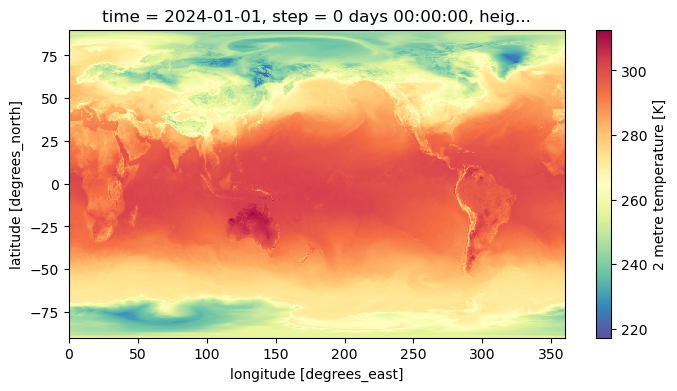

In [12]:
ds.t2m.plot(cmap="Spectral_r", figsize=[8, 4])

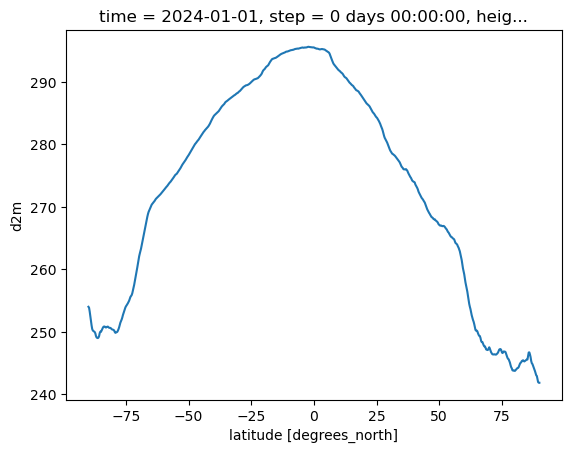

In [18]:
# Compute the mean dew point for each latitude band
ds.d2m.mean(dim="longitude").plot()

## ECMWF data

So far I've shown how to use Herbie to access GFS and HRRR data, but Herbie can discover many different model output files. The ECMWF publishes some open data from the Integrated Forecast System (IFS) publicly. The avaialble inventory for these GRIB files is slightly different than the inventories for the NCEP models.

- NCEP provides GRIB inventories produced by wgrib2;
- ECMWF provides GRIB inventories produced by eccodes.

This means the _style_ of search string is going to be a little different when filtering ECMWF model GRIB fields.


In [14]:
H = Herbie("2024-03-15 18:00", model="ifs")
H.inventory()

✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Mar-15 18:00 UTC F00 ┊ GRIB2 @ azure-scda ┊ IDX @ azure-scda


,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
0,1,0,478649,0-478649,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,swvl1,NaN,sfc,NaN,g,0001,od,fc,scda,:swvl1:sfc:g:0001:od:fc:scda
1,2,478649,891087,478649-891087,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,r,500,pl,NaN,g,0001,od,fc,scda,:r:500:pl:g:0001:od:fc:scda
2,3,891087,1405385,891087-1405385,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,gh,925,pl,NaN,g,0001,od,fc,scda,:gh:925:pl:g:0001:od:fc:scda
3,4,1405385,2272665,1405385-2272665,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,10v,NaN,sfc,NaN,g,0001,od,fc,scda,:10v:sfc:g:0001:od:fc:scda
4,5,2272665,3021660,2272665-3021660,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,v,400,pl,NaN,g,0001,od,fc,scda,:v:400:pl:g:0001:od:fc:scda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,137,103036703,104251475,103036703-104251475,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,vo,150,pl,NaN,g,0001,od,fc,scda,:vo:150:pl:g:0001:od:fc:scda
137,138,104251475,105602360,104251475-105602360,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,d,150,pl,NaN,g,0001,od,fc,scda,:d:150:pl:g:0001:od:fc:scda
138,139,105602360,106923274,105602360-106923274,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,d,50,pl,NaN,g,0001,od,fc,scda,:d:50:pl:g:0001:od:fc:scda
139,140,106923274,108049739,106923274-108049739,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,vo,50,pl,NaN,g,0001,od,fc,scda,:vo:50:pl:g:0001:od:fc:scda


Let's look for all the temperature data at all pressure levels


In [15]:
H.inventory(r":t:\d+:pl")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
6,7,3740423,4353405,3740423-4353405,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,1000,pl,NaN,g,0001,od,fc,scda,:t:1000:pl:g:0001:od:fc:scda
13,14,8368341,9095588,8368341-9095588,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,200,pl,NaN,g,0001,od,fc,scda,:t:200:pl:g:0001:od:fc:scda
24,25,13008213,13545460,13008213-13545460,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,700,pl,NaN,g,0001,od,fc,scda,:t:700:pl:g:0001:od:fc:scda
25,26,13545460,14137300,13545460-14137300,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,300,pl,NaN,g,0001,od,fc,scda,:t:300:pl:g:0001:od:fc:scda
29,30,15476135,16086456,15476135-16086456,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,250,pl,NaN,g,0001,od,fc,scda,:t:250:pl:g:0001:od:fc:scda
32,33,17128847,17729306,17128847-17729306,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,850,pl,NaN,g,0001,od,fc,scda,:t:850:pl:g:0001:od:fc:scda
38,39,22299868,22920334,22299868-22920334,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,100,pl,NaN,g,0001,od,fc,scda,:t:100:pl:g:0001:od:fc:scda
40,41,23673370,24265086,23673370-24265086,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,400,pl,NaN,g,0001,od,fc,scda,:t:400:pl:g:0001:od:fc:scda
45,46,26894807,27499164,26894807-27499164,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,500,pl,NaN,g,0001,od,fc,scda,:t:500:pl:g:0001:od:fc:scda
46,47,27499164,28005180,27499164-28005180,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,t,600,pl,NaN,g,0001,od,fc,scda,:t:600:pl:g:0001:od:fc:scda


Here is the 2-m temperature and dew point


In [16]:
H.inventory(r":2[t|d]")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
55,56,32414736,33106090,32414736-33106090,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,2d,NaN,sfc,NaN,g,0001,od,fc,scda,:2d:sfc:g:0001:od:fc:scda
64,65,38771272,39437754,38771272-39437754,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,2t,NaN,sfc,NaN,g,0001,od,fc,scda,:2t:sfc:g:0001:od:fc:scda


And here is 10-m U and V wind


In [17]:
H.inventory(r":10[u|v]")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
3,4,1405385,2272665,1405385-2272665,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,10v,NaN,sfc,NaN,g,0001,od,fc,scda,:10v:sfc:g:0001:od:fc:scda
58,59,34714064,35586123,34714064-35586123,2024-03-15 18:00:00,2024-03-15 18:00:00,0 days,10u,NaN,sfc,NaN,g,0001,od,fc,scda,:10u:sfc:g:0001:od:fc:scda


Use these same filters when downloading and opening with xarray.

Sometimes it takes some experientation to find exactly what you are looking for. But keep at it and you'll get the hang of it.
